In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [68]:
df_train=pd.read_csv('/kaggle/input/titanic/train.csv')

In [69]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


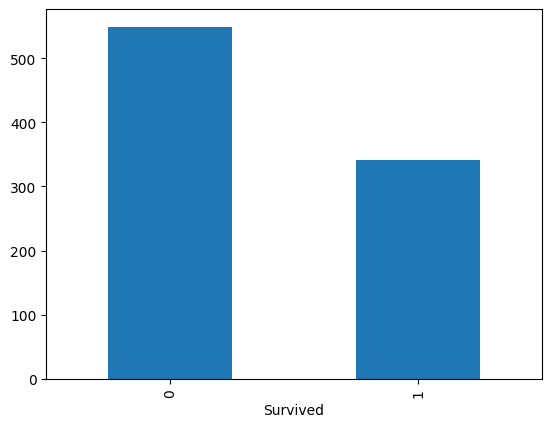

In [72]:
df_train['Survived'].value_counts().plot(kind='bar')
plt.show()

In [73]:
feat_n=['PassengerId','Age','SibSp','Parch','Fare']
feat_o=['Pclass']
feat_c=['Name','Sex','Ticket','Cabin','Embarked']

In [74]:
for n in feat_o:
    print(df_train[n].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [75]:
for c in feat_c:
    print(df_train[c].value_counts())

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1

# New features to create: 
* Family groups - From ticket number. Although ticket numbers are not all numeric
* number of cabins - done
* First name and last name - how to convert this in to a numeric?
* Positioning on the ship - Cabin number? There are several missing points. Is this missing at random?? Split into Class B or C, and door number. 

Challenge: How to convert following into numerics?
* Ticket numbers
* First name and last name or atleast just first name
* GroupSize = same ticket number (what about same first name?)

In [76]:
df_train.shape

(891, 12)

In [77]:
df_train['Sex']=df_train['Sex'].replace({'male':0,'female':1})

df_train[['FirstName','LastName']]=df_train['Name'].str.split(',',expand=True)
df_fname=df_train['FirstName'].value_counts().to_frame().reset_index()
df_fname.rename(columns={'count':'NameFreq'},inplace=True)
df_train=pd.merge(df_train,df_fname,on='FirstName')
df_train.drop(columns=['Name','FirstName','LastName'],inplace=True)

# df_train['Ticket']=df_train['Ticket'].astype(str)
df_tics=df_train['Ticket'].value_counts().to_frame().reset_index()
df_tics.rename(columns={'count':'TicketFreq'},inplace=True)
df_tics['Ticket']=df_tics['Ticket'].astype(str)
df_train=pd.merge(df_train,df_tics,on='Ticket')
df_train.drop(columns='Ticket',inplace=True)

df_train['nCabins']=df_train['Cabin'].str.split(' ',expand=True).notnull().sum(axis=1)
# df_train['CabinChar']=df_train['Cabin'].str[0]
# df_train['CabinNum']=df_train['Cabin'].str[1:]

df_cabins=df_train['Cabin'].value_counts().to_frame().reset_index()
df_cabins.rename(columns={'count':'CabinFreq'},inplace=True)
df_train=pd.merge(df_train,df_cabins,on='Cabin',how='left')
df_train.drop(columns='Cabin',inplace=True)
df_train['CabinFreq']=df_train['CabinFreq'].fillna(0)
print('How to separate cabin name and num if there are multiple cabins reported?')


df_train=pd.get_dummies(df_train, columns=['Embarked'],drop_first=True)

df_train['LogFare']=np.log(df_train['Fare'])
df_train.drop(columns='Fare',inplace=True)

df_train['Age']=df_train['Age'].fillna(np.mean(df_train['Age']))
df_train['LogAge']=np.log(df_train['Age'])
df_train.drop(columns='Age',inplace=True)



How to separate cabin name and num if there are multiple cabins reported?


/tmp/ipykernel_33/3027758075.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Sex']=df_train['Sex'].replace({'male':0,'female':1})
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [78]:
df_train.shape

(891, 14)

In [79]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,NameFreq,TicketFreq,nCabins,CabinFreq,Embarked_Q,Embarked_S,LogFare,LogAge
0,1,0,3,0,1,0,2,1,0,0.0,False,True,1.981001,3.091042
1,2,1,1,1,1,0,1,1,1,1.0,False,False,4.266662,3.637586
2,3,1,3,1,0,0,1,1,0,0.0,False,True,2.070022,3.258097
3,4,1,1,1,1,0,2,2,1,2.0,False,True,3.972177,3.555348
4,5,0,3,0,0,0,2,1,0,0.0,False,True,2.085672,3.555348


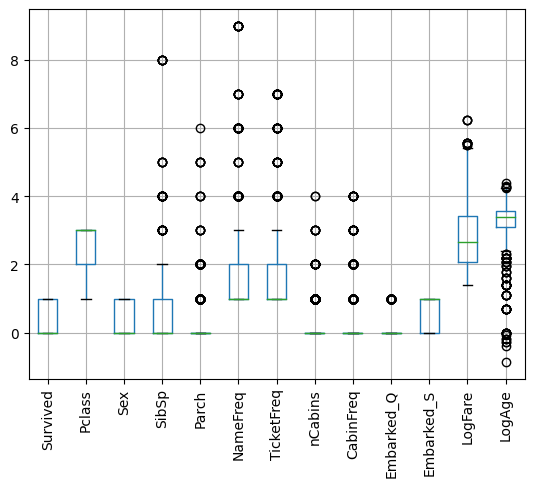

In [80]:
df_train.drop(columns='PassengerId').boxplot()
plt.xticks(rotation=90)
plt.show()

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   NameFreq     891 non-null    int64  
 7   TicketFreq   891 non-null    int64  
 8   nCabins      891 non-null    int64  
 9   CabinFreq    891 non-null    float64
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
 12  LogFare      891 non-null    float64
 13  LogAge       891 non-null    float64
dtypes: bool(2), float64(3), int64(9)
memory usage: 85.4 KB


<Axes: xlabel='Survived', ylabel='PassengerId'>

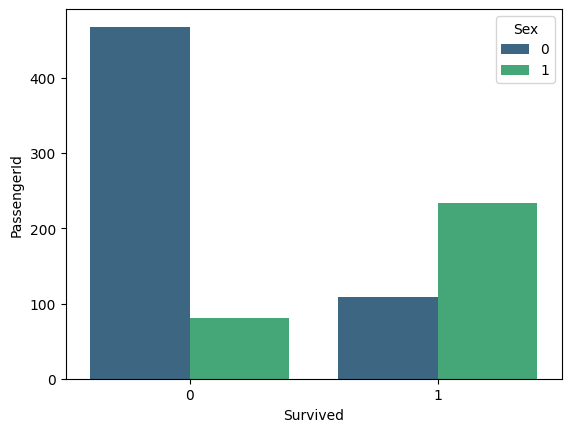

In [86]:
sns.barplot(data=df_train.groupby(['Survived','Sex'])['PassengerId'].agg('count').reset_index(),x='Survived',y='PassengerId',hue='Sex',palette='viridis')

In [ ]:
# df_train.drop(columns='PassengerId',inplace=True)

# Machine Learning

Cabins: Create as many columns as max number of cabins
split each cabin design into name and number
fill noncabins with 0
how to separate missing info with noncabins info?

In [ ]:
X=df_train.drop(columns='Survived')
y=df_train['Survived']